Notes: Write all code related to this assignment in single jupyter notebook. Implement K-means algorithm from scratch, do not use any predefined ML library function for K-means algorithm. Use single word document to answer questions.

1. Given that K-means depends on distance metric, it is a convention to normalize the data attributes so that attributes are on the same scale.  So, in this first task, normalize all data attributes. [2 points]

2. Write your own code for K-means algorithm using two attributes namely average_runs and bowling_economy. Take K=2. Plot clusters on a scatter plot with X and Y being the two attributes namely average_runs and bowling_economy, respectively. Color data points belonging to the first cluster with red and the second cluster with blue. Copy the plot diagram in the word document and interpret the output. [3 points]

3. Redo question-2 on different values of K = 2,3,4,5. For each case, draw the plot of clusters as stated above. Visualize these plots, copy the plot diagrams in the word document,  and comment on which is better clustering (and reasons) based on visualization only. [3 points]

4. Write a few lines in a word document about the interpretation of the best clusters obtained. Also write a few statements about how these clusters can be useful. [2 points]

In [186]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use
plt.style.use('ggplot')
import seaborn as sns
import random

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder  

from sklearn.preprocessing import StandardScaler


In [187]:
#loading the dataset. NOTE: The file has been modified before importing to add the data labels. 
#Modified data file is attached with the submission.
data = pd.read_csv("cricketers.csv")
data.head()

,PLAYER matches_played innings_batted runs_scored highest_runs balls_faced average_runs strike_rate innings_bowled overs runs_given wickets_obtained average_runs_per_wicket bowling_economy
0,Aaron Finch\t10\t9\t134\t46\t100\t16.75\t144\t...
1,AB de Villiers\t12\t11\t480\t90\t275\t53.33\t1...
2,Abhishek Sharma\t3\t3\t63\t46\t33\t63\t190.9\t...
3,Ajinkya Rahane\t15\t14\t370\t65\t313\t28.46\t1...
4,Alex Hales\t6\t6\t148\t45\t118\t24.66\t125.42\...


In [188]:
#Seems it has tab as separator instead of usual ,. Lets read it with corrector separator
data = pd.read_csv("cricketers.csv",sep ='\t')
data.head()

,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,10,9,134,46,100,16.75,144.00,0,0.0,0,0,0.0,0.0
1,AB de Villiers,12,11,480,90,275,53.33,174.54,0,0.0,0,0,0.0,0.0
2,Abhishek Sharma,3,3,63,46,33,63.00,190.90,0,0.0,0,0,0.0,0.0
3,Ajinkya Rahane,15,14,370,65,313,28.46,118.21,0,0.0,0,0,0.0,0.0
4,Alex Hales,6,6,148,45,118,24.66,125.42,0,0.0,0,0,0.0,0.0


In [189]:
data.dtypes

PLAYER                       object
matches_played                int64
innings_batted                int64
runs_scored                   int64
highest_runs                  int64
balls_faced                   int64
average_runs                float64
strike_rate                 float64
innings_bowled                int64
overs                       float64
runs_given                    int64
wickets_obtained              int64
average_runs_per_wicket     float64
bowling_economy             float64
dtype: object

In [190]:
#We don't need player name, lets drop it

data.drop(data.columns[[0]], axis = 1, inplace = True) 

data.dtypes

matches_played                int64
innings_batted                int64
runs_scored                   int64
highest_runs                  int64
balls_faced                   int64
average_runs                float64
strike_rate                 float64
innings_bowled                int64
overs                       float64
runs_given                    int64
wickets_obtained              int64
average_runs_per_wicket     float64
bowling_economy             float64
dtype: object

In [191]:
data.shape

(109, 13)

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 13 columns):
matches_played              109 non-null int64
innings_batted              109 non-null int64
runs_scored                 109 non-null int64
highest_runs                109 non-null int64
balls_faced                 109 non-null int64
average_runs                109 non-null float64
strike_rate                 109 non-null float64
innings_bowled              109 non-null int64
overs                       109 non-null float64
runs_given                  109 non-null int64
wickets_obtained            109 non-null int64
average_runs_per_wicket     109 non-null float64
bowling_economy             109 non-null float64
dtypes: float64(5), int64(8)
memory usage: 11.1 KB


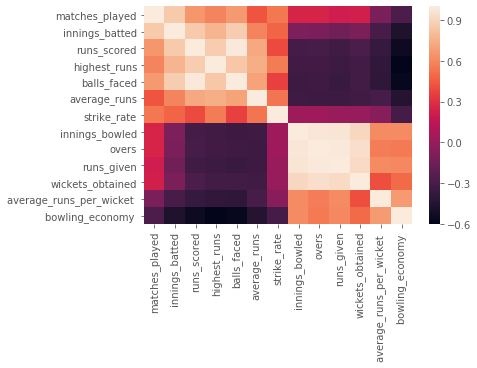

In [193]:
#Finding correlation
corr = data.corr()
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [1]:
#There seems to be strong coorelation between balls faced and runs scored, runs given & overs, 
#runs given and wickets obtaiend etc.

#First lets do attribute/feature scaling since K-means depends on distance metric and so data must be normalized
sc_X = StandardScaler()
data_scaled = pd.DataFrame(sc_X.fit_transform(data),columns = data.columns)

data_scaled.head(10)

NameError: name 'StandardScaler' is not defined

In [1]:
#Lets develop k-means algorithm using attributes average_runs and bowling_economy and K=2.

X = data_scaled.iloc[:,[5,12]].values
X

NameError: name 'data_scaled' is not defined

In [196]:
X.shape

(109, 2)

In [197]:
#Selecting number of iterations as 500
n_iter = 500

In [198]:
#Setting K to 2
K = 2  #number of clusters


m = X.shape[0] #this is number of rows
n = X.shape[1] #this is number of features

#Step 1 - Initializing centroids 
Centroids = np.array([]).reshape(n,0)

for i in range(K):
    rand = random.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

print(Centroids)


[[-0.31399883  0.57055034]
 [-1.08383228 -1.08383228]]


In [199]:
#Step 2 - Calculating euclidian distance from centroid to points and assigning an appropriate cluster to points

Output = {}
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

C.shape

(109,)

In [200]:
#Step 3 - Regrouping the data points based on the cluster index C and store in Output dictionary.
#Compute the mean of spearated clusters and assign new centroids
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

In [201]:
#Looping through number of iterations
for i in range(n_iter):
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

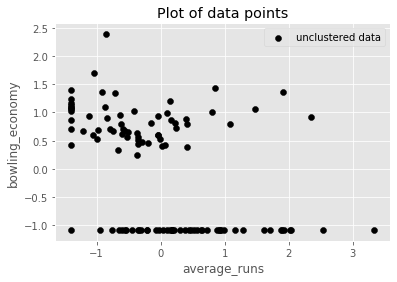

In [202]:
#Step 4 - Plot un-clustered data
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('average_runs')
plt.ylabel('bowling_economy')
plt.legend()
plt.title('Plot of data points')
plt.show()

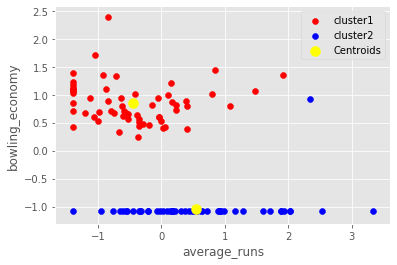

In [203]:
#Step 5 - Plot clustered data
color=['red','blue']
labels=['cluster1','cluster2']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=100,c='yellow',label='Centroids')
plt.xlabel('average_runs')
plt.ylabel('bowling_economy')
plt.legend()
plt.show()

INTERPRETATION:
This nicely breaks the data-points in two clusters, CLUSTER 1 denotes the bowlers who have a certain bowling efficiency scores; some of the bowlers are all-rounders, i.e. they also bat and have average run scores.
CLUSTER 2 denotes pure batsmen (who do not bowl at all, so don't have bowling economy scores), but have a range of average runs. 

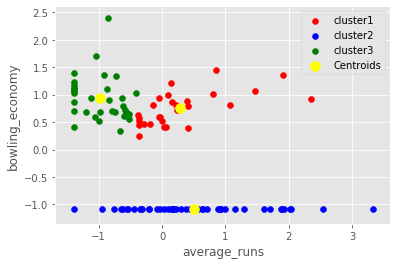

In [204]:
#Setting K to 3
K = 3  #number of clusters


m = X.shape[0] #this is number of rows
n = X.shape[1] #this is number of features

#Step 1 - Initializing centroids 
Centroids = np.array([]).reshape(n,0)

for i in range(K):
    rand = random.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

#Step 2 - Calculating euclidian distance from centroid to points and assigning an appropriate cluster to points

Output = {}
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

#Step 3 - Regrouping the data points based on the cluster index C and store in Output dictionary.
#Compute the mean of spearated clusters and assign new centroids
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

#Looping through number of iterations
for i in range(n_iter):
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y


#Step 5 - Plot clustered data
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=100,c='yellow',label='Centroids')
plt.xlabel('average_runs')
plt.ylabel('bowling_economy')
plt.legend()
plt.show()

INTERPRETATION:
This nicely breaks the data-points in three clusters, CLUSTER 1 denotes the bowlers who are also all-rounders, i.e. they also bat and have average run scores. CLUSTER 3 denotes pure bowlers.
CLUSTER 2 denotes pure batsmen (who do not bowl at all, so don't have bowling economy scores), but have a range of average runs. 

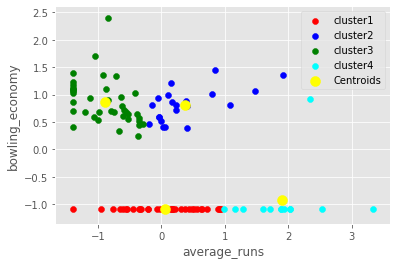

In [205]:
#Setting K to 4
K = 4  #number of clusters


m = X.shape[0] #this is number of rows
n = X.shape[1] #this is number of features

#Step 1 - Initializing centroids 
Centroids = np.array([]).reshape(n,0)

for i in range(K):
    rand = random.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

#Step 2 - Calculating euclidian distance from centroid to points and assigning an appropriate cluster to points

Output = {}
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

#Step 3 - Regrouping the data points based on the cluster index C and store in Output dictionary.
#Compute the mean of spearated clusters and assign new centroids
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

#Looping through number of iterations
for i in range(n_iter):
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y


#Step 5 - Plot clustered data
color=['red','blue','green','cyan']
labels=['cluster1','cluster2','cluster3','cluster4']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=100,c='yellow',label='Centroids')
plt.xlabel('average_runs')
plt.ylabel('bowling_economy')
plt.legend()
plt.show()

INTERPRETATION:
This clustering seems best, we can clearly see 4 clusters and each cluster has sufficient data points. 
CLUSTER 1 - Pure batsmen with lower batting average
CLUSTER 2 - All-rounder bowlers
CLUSTER 3 - Pure bowlers
CLUSTER 4 - Pure batsmen with higher batting average.

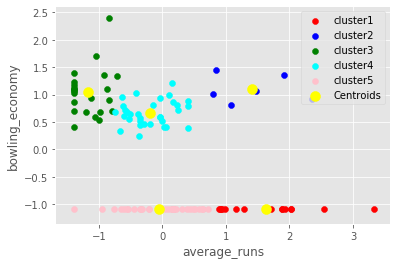

In [206]:
#Setting K to 5
K = 5  #number of clusters


m = X.shape[0] #this is number of rows
n = X.shape[1] #this is number of features

#Step 1 - Initializing centroids 
Centroids = np.array([]).reshape(n,0)

for i in range(K):
    rand = random.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

#Step 2 - Calculating euclidian distance from centroid to points and assigning an appropriate cluster to points

Output = {}
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

#Step 3 - Regrouping the data points based on the cluster index C and store in Output dictionary.
#Compute the mean of spearated clusters and assign new centroids
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

#Looping through number of iterations
for i in range(n_iter):
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y


#Step 5 - Plot clustered data
color=['red','blue','green','cyan','pink']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=100,c='yellow',label='Centroids')
plt.xlabel('average_runs')
plt.ylabel('bowling_economy')
plt.legend()
plt.show()

INTERPRETATION
This clustering is also showing various groups as in K=4 case, however, there does not seem to be much data points in CLUSTER 2. For the small number of data points, i.e. 109 data points, K=5 may an overkill. 

CLUSTER 5 - Pure batsmen with lower batting average
CLUSTER 2 - All-rounder batsmen, with higher batting average but also higher bowling economy.
CLUSTER 3 - Pure bowlers
CLUSTER 1 - Pure batsmen with higher batting average.
CLUSTER 4 - All-rounder bowlers, with lower batting average but also lower bowling economy.